In [1]:
%load_ext autoreload
%autoreload 2
notebook_fixed_dir = False

In [2]:
# this cell can only be called once
import os
if not notebook_fixed_dir:
    os.chdir('..')
    notebook_fixed_dir = True
print(os.getcwd())

/home/svcl-oowl/brandon/research/sil_consistent_at_inference


In [12]:
import pprint
import glob
from pathlib import Path
import pickle
import random

import torch
from PIL import Image
import numpy as np
from pytorch3d.renderer import look_at_view_transform, PointLights, TexturesVertex, Textures
import matplotlib.pyplot as plt
import trimesh

from utils import general_utils
from utils import visualization_tools
from utils.eval_utils import eval_metrics
#from evaluation import compute_iou_2d, compute_iou_2d_given_pose, compute_iou_3d, compute_chamfer_L1

In [4]:
#models_dir = "/home/svcl-oowl/dataset/ShapeNetCore.v1"
#class_id = "03001627"
#instance = "cbcc5cd1aec9f3413aa677469bbdd68c"
#model_path = os.path.join(models_dir, class_id, instance, "model_watertight.obj")
model_path = "data/refinements/shapenet_occnet_refinements/bf_pose/02691156/batch_1_of_2/d18592d9615b01bbbc0909d98a1ff2b4.obj"
device = torch.device("cuda:0")
mesh = general_utils.load_untextured_mesh(model_path, device)

In [15]:
num_verts = mesh.verts_packed().shape[0]
verts_rgb = torch.rand((1, num_verts,3), device=device)
print(verts_rgb)
mesh.textures = TexturesVertex(verts_rgb)

tensor([[[0.6374, 0.7585, 0.1898],
         [0.7484, 0.7305, 0.6674],
         [0.6687, 0.4096, 0.6284],
         ...,
         [0.5559, 0.1809, 0.3533],
         [0.3403, 0.6485, 0.2495],
         [0.2214, 0.2765, 0.4169]]], device='cuda:0')


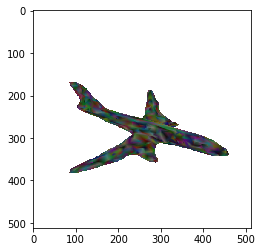

In [19]:
dist = 1
elev = 35
azim = 25
R, T = look_at_view_transform(dist, elev, azim)

no_lights = PointLights(device=device, ambient_color=((0.5,0.5,0.5),), diffuse_color=((0.0,0.0,0.0),), specular_color=((0.0,0.0,0.0),))
render = general_utils.render_mesh(mesh, R, T, device, custom_lights=no_lights)
#render = general_utils.render_mesh(mesh, R, T, device)
plt.imshow(render[0, ..., :3].detach().cpu().numpy())